In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [215]:
# Cleaned Dataset
path=r"C:\\Users\\ADMIN\\Downloads\\Traffic.csv"
df=pd.read_csv(path)     # importing Data
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [216]:
# Type of Dataset
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [217]:
#shape of Dataset
df.shape 

(2976, 9)

In [218]:


df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [219]:
# columns in Dataset
df.columns 

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [220]:
# Information about Dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [221]:
#checking null values in Dataset
df.isnull().sum()  

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

# Univariate analysis(numerical columns)

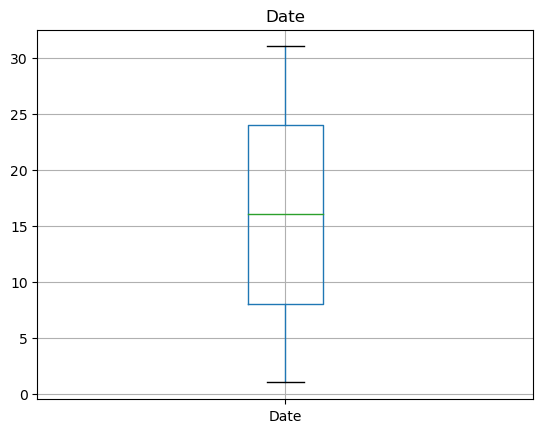

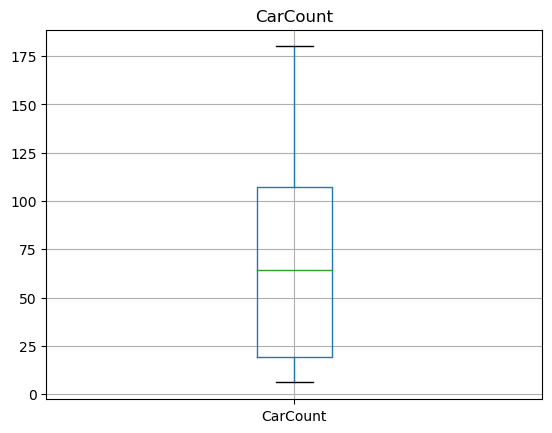

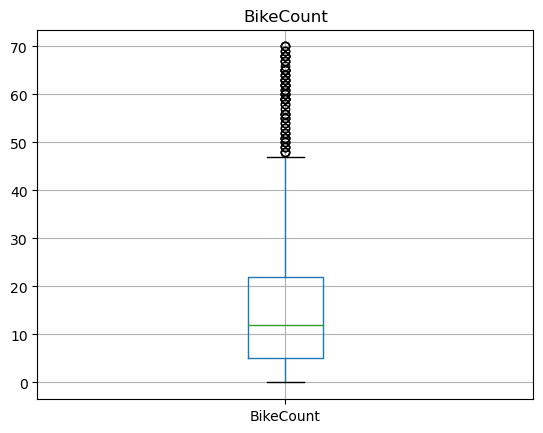

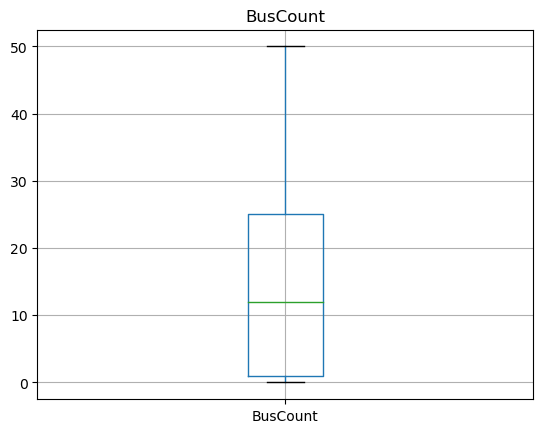

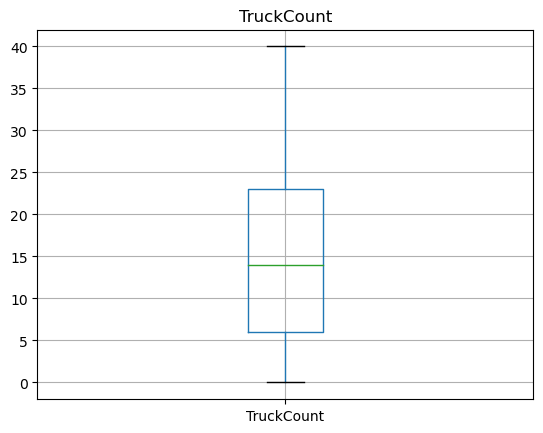

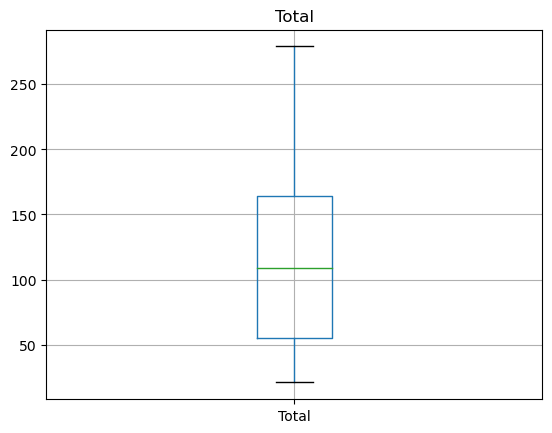

In [222]:
def plot_box(df):
    for column in df.columns:
        if df[column].dtype == np.int64 :
                plot_box = df.boxplot( column=column)
                plt.title(f"{column}")
                plt.show()
plot_box(df)

In [223]:
# Removing of outliers by using IQR method
q1=df['BikeCount'].quantile(0.25)
q3=df['BikeCount'].quantile(0.75)
IQR=q3-q1
BikeCount_lower_bound=q1-1.5*IQR
BikeCount_upper_bound=q3+1.5*IQR
clean_df=df[(df['BikeCount']>BikeCount_lower_bound)&(df['BikeCount']<BikeCount_upper_bound)]
print(clean_df.shape)
print(df.shape)


(2899, 9)
(2976, 9)


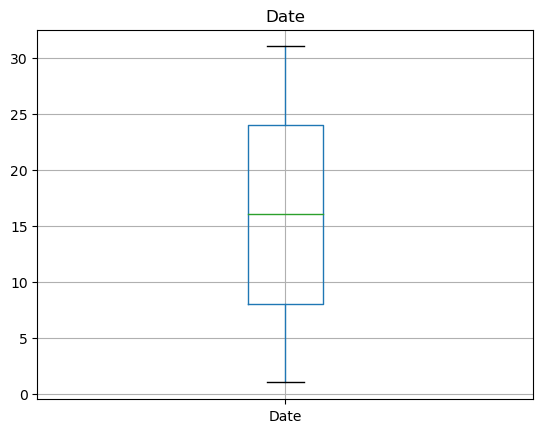

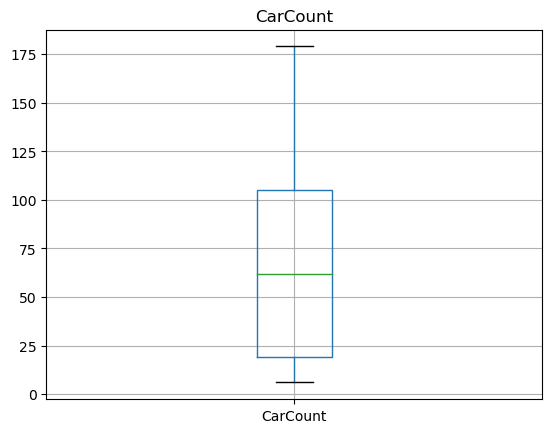

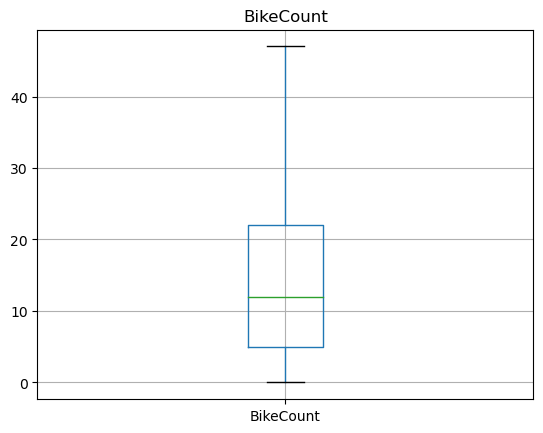

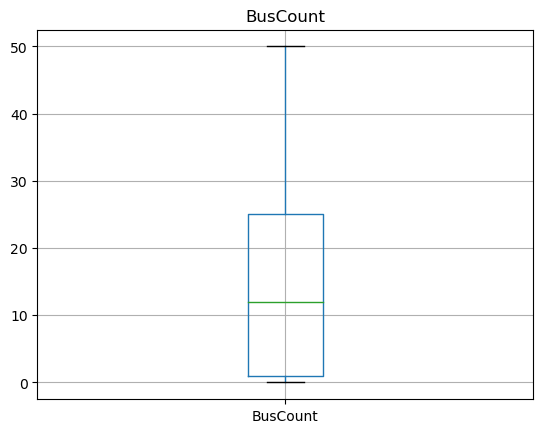

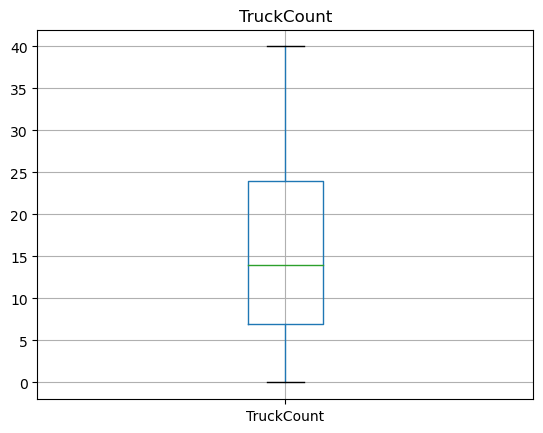

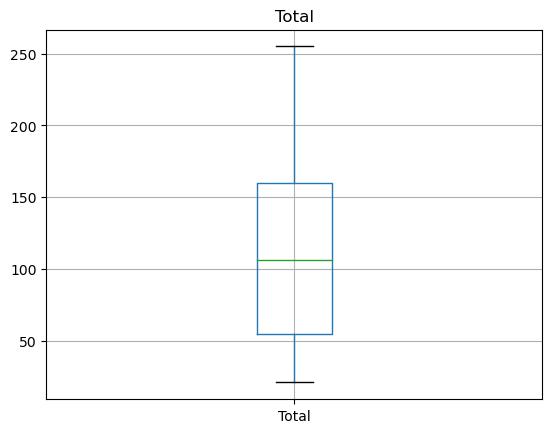

In [224]:

def plot_box(clean_df):
    for column in clean_df.columns:
        if clean_df[column].dtype == np.int64 or clean_df[column].dtype == np.int32:
                plot_box = clean_df.boxplot( column=column)
                plt.title(f"{column}")
                plt.show()
plot_box(clean_df)

In [225]:
clean_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


# Univariate analysis(Categorical column)

No need to plot for "Time" column.


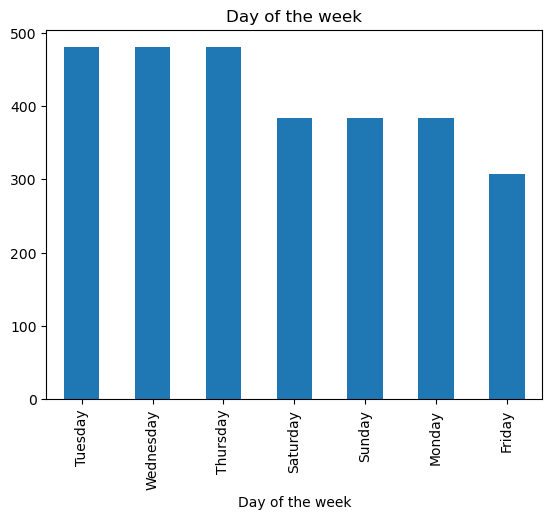

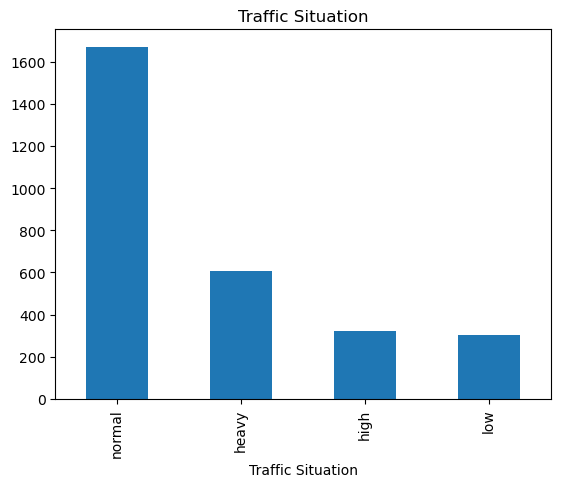

In [226]:
def plot_bar(clean_df):
    for column in clean_df.columns:
        if clean_df[column].dtype == object:
            if column == 'Time':
                print('No need to plot for "Time" column.')   
            else:
                counts = clean_df[column].value_counts()
                counts.plot(kind='bar')
                plt.title(column)
                plt.show()
plot_bar(clean_df)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


# Bivariate analysis(cat vs num)

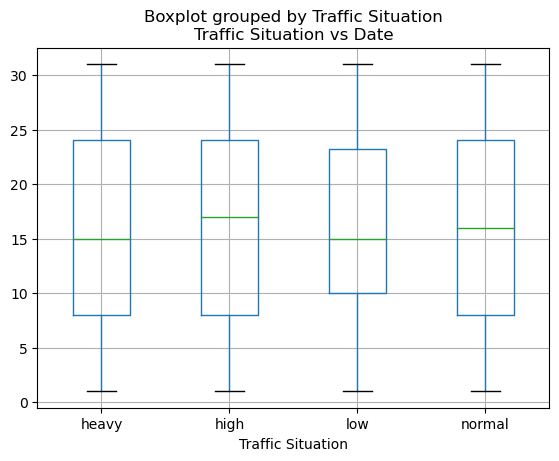

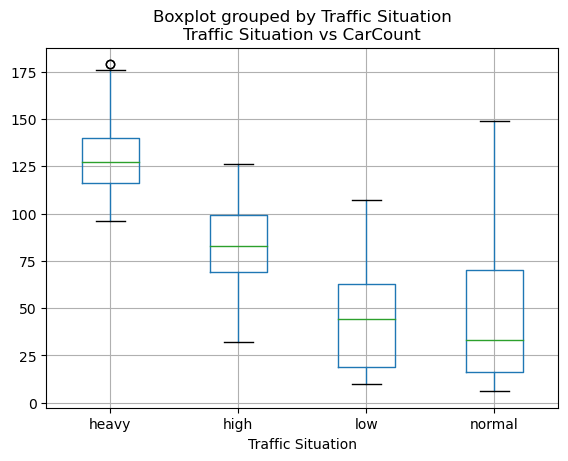

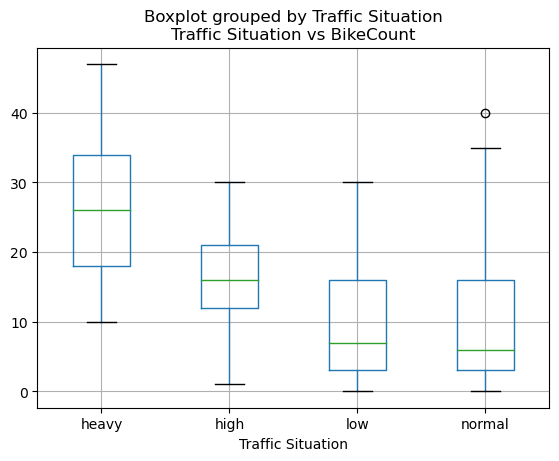

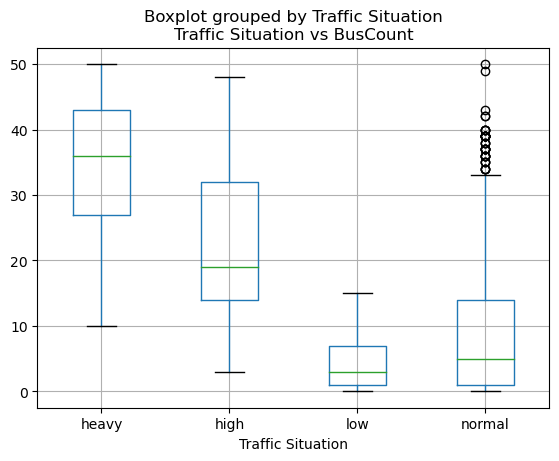

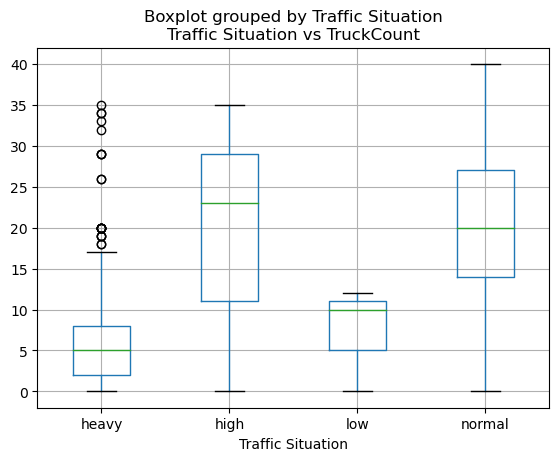

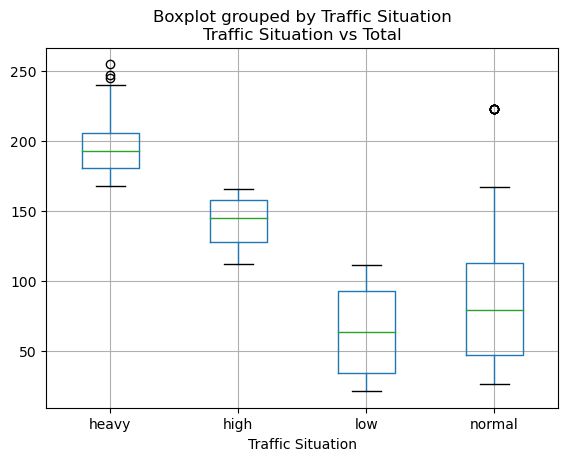

In [228]:
def plot_box(clean_df):
    a = clean_df["Traffic Situation"]
    for column in clean_df.columns:
        if clean_df[column].dtype == np.int64 :
            if column =='Day of the week':
                print('No need to plot')
            else:    
                plot_box = clean_df.boxplot( by="Traffic Situation",column=column)
                plt.title(f"Traffic Situation vs {column}")
                plt.show()
plot_box(clean_df)

# Bivariate analysis(cat vs cat)

No need to plot for "Time" column.


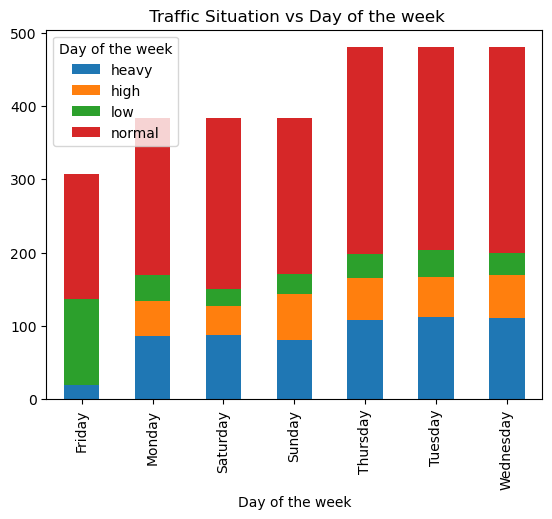

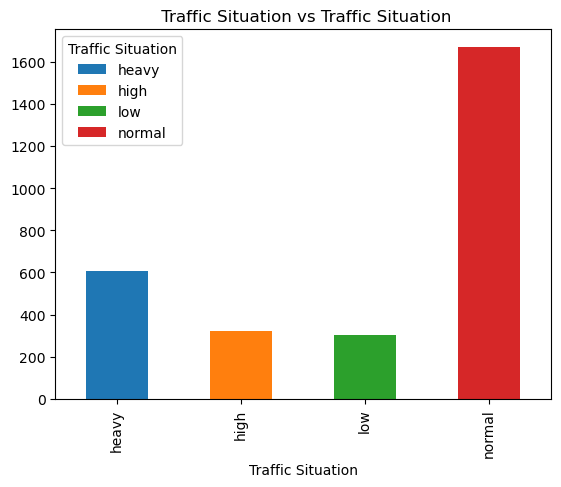

In [229]:
def plot_stack(clean_df):
    a = clean_df["Traffic Situation"]
    for column in clean_df.columns:
        if clean_df[column].dtype == object:
            if column=='Time':
                print('No need to plot for "Time" column.')
            else:    
                plot_stck = pd.crosstab(index=clean_df[column], columns=a)
                plot_stck.plot(kind='bar', stacked=True)
                plt.title(f" Traffic Situation vs {column}")
                plt.legend(title=column)
                plt.show()
plot_stack(clean_df)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


# Model building

In [231]:
y=clean_df["Traffic Situation"]
X=clean_df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount','TruckCount','Total']]

In [232]:
y.unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [233]:
y = y.map({'low':0,'normal':1,'heavy':2,'high':3})

In [234]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2174, 7) (2174,)
(725, 7) (725,)


In [235]:
X_train.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
1194,22,Saturday,50,25,25,28,128
788,18,Wednesday,99,4,7,19,129
713,17,Tuesday,90,2,15,18,125
2828,8,Wednesday,36,9,8,28,81
1926,30,Monday,18,4,0,31,53


In [236]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,Day of the week
1194,Saturday
788,Wednesday
713,Tuesday
2828,Wednesday
1926,Monday


In [237]:
X_train_num=X_train.select_dtypes(include=['int64','int32'])
X_train_num.head()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
1194,22,50,25,25,28,128
788,18,99,4,7,19,129
713,17,90,2,15,18,125
2828,8,36,9,8,28,81
1926,30,18,4,0,31,53


# Data preparation on train data:

In [238]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train_num_rescaled=pd.DataFrame(Scaler.fit_transform(X_train_num),
                                 columns=X_train_num.columns,
                                 index=X_train_num.index)
x_train_num_rescaled.head()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
1194,0.650084,-0.358387,1.054766,0.683377,1.161774,0.304897
788,0.207257,0.754239,-0.909833,-0.562635,0.300088,0.322322
713,0.096550,0.549879,-1.096938,-0.008852,0.204345,0.252622
2828,-0.899811,-0.676280,-0.442072,-0.493412,1.161774,-0.514077
1926,1.535739,-1.085000,-0.909833,-1.047196,1.449003,-1.001976


In [239]:
X_train_num.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000
mean,16.127875,65.783349,13.725391,15.127875,15.865685,110.502300
std,9.034944,44.050096,10.691659,14.449405,10.447044,57.402101
min,1.000000,6.000000,0.000000,0.000000,0.000000,22.000000
25%,8.000000,19.000000,4.000000,1.000000,7.000000,54.000000
50%,16.000000,61.000000,12.000000,12.000000,15.000000,106.000000
75%,24.000000,105.000000,22.000000,25.000000,24.000000,159.000000
max,31.000000,176.000000,47.000000,50.000000,40.000000,245.000000


In [240]:
X_train_cat['Day of the week'].value_counts()

Day of the week
Tuesday      371
Wednesday    365
Thursday     364
Saturday     288
Monday       287
Sunday       283
Friday       216
Name: count, dtype: int64

In [241]:
X_train_cat_ord = X_train_cat[['Day of the week']]  
X_train_cat_ord = pd.DataFrame(X_train_cat_ord, columns=['Day of the week']) 

X_train_cat_ord.head()

,Day of the week
1194,Saturday
788,Wednesday
713,Tuesday
2828,Wednesday
1926,Monday


In [242]:
X_train_cat_LabelEnc = pd.DataFrame(index=X_train_cat_ord.index)

X_train_cat_LabelEnc.head()

""
1194
788
713
2828
1926


In [243]:
X_train_cat_ord['Day of the week'].unique()

array(['Saturday', 'Wednesday', 'Tuesday', 'Monday', 'Friday', 'Thursday',
       'Sunday'], dtype=object)

In [244]:
cut_encoder = {'Monday' : 1, 'Tuesday' : 2, 'Wednesday' : 3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

X_train_cat_LabelEnc['Day of the week'] = X_train_cat['Day of the week'].apply(lambda x : cut_encoder[x])

X_train_cat_LabelEnc.head()

,Day of the week
1194,6
788,3
713,2
2828,3
1926,1


In [245]:
X_train_transformed=pd.concat([x_train_num_rescaled,X_train_cat_LabelEnc],axis=1)
X_train_transformed.head()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week
1194,0.650084,-0.358387,1.054766,0.683377,1.161774,0.304897,6
788,0.207257,0.754239,-0.909833,-0.562635,0.300088,0.322322,3
713,0.096550,0.549879,-1.096938,-0.008852,0.204345,0.252622,2
2828,-0.899811,-0.676280,-0.442072,-0.493412,1.161774,-0.514077,3
1926,1.535739,-1.085000,-0.909833,-1.047196,1.449003,-1.001976,1


# Data preparation on test data:

In [246]:
X_test_num=X_test.select_dtypes(include=['int64','int32'])
X_test_num.head()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
2558,5,70,18,28,5,121
623,16,44,9,10,24,87
98,11,16,1,0,14,31
790,18,102,24,2,8,136
2677,6,96,21,11,24,152


In [247]:
x_test_num_rescaled=pd.DataFrame(Scaler.transform(X_test_num),
                                 columns=X_test_num.columns,
                                 index=X_test_num.index)
x_test_num_rescaled.head()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
2558,-1.231932,0.095746,0.399900,0.891046,-1.040312,0.182922
623,-0.014157,-0.494627,-0.442072,-0.354967,0.778803,-0.409527
98,-0.567691,-1.130413,-1.190490,-1.047196,-0.178626,-1.385325
790,0.207257,0.822359,0.961214,-0.908750,-0.753083,0.444297
2677,-1.121225,0.686119,0.680557,-0.285744,0.778803,0.723096


In [248]:
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_cat.head()

,Day of the week
2558,Sunday
623,Monday
98,Wednesday
790,Wednesday
2677,Monday


In [249]:
X_test_cat_LabelEnc = pd.DataFrame(index=X_test_cat.index)

X_test_cat_LabelEnc.head()

""
2558
623
98
790
2677


In [250]:
X_test_cat_LabelEnc['Day of the week'] = X_test_cat['Day of the week'].apply(lambda x : cut_encoder[x])

X_test_cat_LabelEnc.head()

,Day of the week
2558,7
623,1
98,3
790,3
2677,1


In [251]:
X_test_transformed=pd.concat([x_test_num_rescaled,X_test_cat_LabelEnc],axis=1)
X_test_transformed.head()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week
2558,-1.231932,0.095746,0.399900,0.891046,-1.040312,0.182922,7
623,-0.014157,-0.494627,-0.442072,-0.354967,0.778803,-0.409527,1
98,-0.567691,-1.130413,-1.190490,-1.047196,-0.178626,-1.385325,3
790,0.207257,0.822359,0.961214,-0.908750,-0.753083,0.444297,3
2677,-1.121225,0.686119,0.680557,-0.285744,0.778803,0.723096,1


In [252]:
#!pip install keras-tuner --upgrade
#!pip install hyperopt

In [253]:
import pandas as pd
import numpy as np
import keras

from sklearn.model_selection import train_test_split
#i#mport imblearn
#from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras_tuner as k
# from hyperopt import fmin, tpe, Trials
from keras import Sequential
from keras.layers import Dense
#pip install keras-tuner --upgrade

In [287]:
def modellss(hp):
    model=Sequential()
    model.add(Input(shape=(X_train_transformed.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=15),activation=hp.Choice("activation", values=["sigmoid", "tanh", "relu"])
                                ,kernel_initializer=hp.Choice("weight_init", values=["glorot_uniform", "glorot_normal", "he_uniform", "he_normal"])))

    model.add(Dense(4,activation="softmax"))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [288]:
tuner=k.RandomSearch(modellss,objective="val_accuracy",max_trials=15,directory="C:\\Users\\ADMIN\\Downloads\\DL folders",project_name="f2")

In [289]:
tuner.search(X_train_transformed,y_train,epochs=55,validation_data=(X_test_transformed,y_test)) 

Trial 15 Complete [00h 00m 15s]
val_accuracy: 0.9213793277740479

Best val_accuracy So Far: 0.9420689940452576
Total elapsed time: 00h 03m 26s


In [290]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'], 'ordered': False}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1

In [291]:
tuner.results_summary()

Results summary
Results in C:\Users\ADMIN\Downloads\DL folders\f2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
hiddenlayers: 5
neurons0: 4
activation: tanh
weight_init: glorot_normal
neurons1: 12
neurons2: 12
neurons3: 14
neurons4: 4
neurons5: 3
neurons6: 12
neurons7: 1
neurons8: 2
neurons9: 14
Score: 0.9420689940452576

Trial 08 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 12
activation: relu
weight_init: he_uniform
neurons1: 8
neurons2: 15
neurons3: 2
neurons4: 14
neurons5: 6
neurons6: 12
neurons7: 5
neurons8: 14
neurons9: 12
Score: 0.935172438621521

Trial 03 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 12
activation: relu
weight_init: glorot_uniform
neurons1: 13
neurons2: 2
neurons3: 11
neurons4: 6
neurons5: 10
neurons6: 1
neurons7: 5
Score: 0.9337931275367737

Trial 07 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 12
activation: relu
weight_init: he_normal
neurons1: 9
neurons2: 9
neurons3: 11
neurons4: 1

In [292]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 5,
 'neurons0': 4,
 'activation': 'tanh',
 'weight_init': 'glorot_normal',
 'neurons1': 12,
 'neurons2': 12,
 'neurons3': 14,
 'neurons4': 4,
 'neurons5': 3,
 'neurons6': 12,
 'neurons7': 1,
 'neurons8': 2,
 'neurons9': 14}

In [293]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [294]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 12)                60        
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 14)                182       
                                                                 
 dense_4 (Dense)             (None, 4)                 60        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 510 (1.99 KB)
Trainable params: 510 (1.99 

In [295]:
hist=fmodel.fit(X_train_transformed,y_train,batch_size=10,epochs=10,validation_split=0.1)

Epoch 1/10
196/196 [==============================] - 2s 3ms/step - loss: 0.1996 - accuracy: 0.9254 - val_loss: 0.2715 - val_accuracy: 0.9128
Epoch 2/10
196/196 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9269 - val_loss: 0.2258 - val_accuracy: 0.9083
Epoch 3/10
196/196 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9325 - val_loss: 0.2748 - val_accuracy: 0.8991
Epoch 4/10
196/196 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9335 - val_loss: 0.2240 - val_accuracy: 0.9220
Epoch 5/10
196/196 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9392 - val_loss: 0.1986 - val_accuracy: 0.9358
Epoch 6/10
196/196 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9315 - val_loss: 0.2301 - val_accuracy: 0.8991
Epoch 7/10
196/196 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9361 - val_loss: 0.2093 - val_accuracy: 0.9266
Epoch 

In [296]:
import matplotlib.pyplot as plt

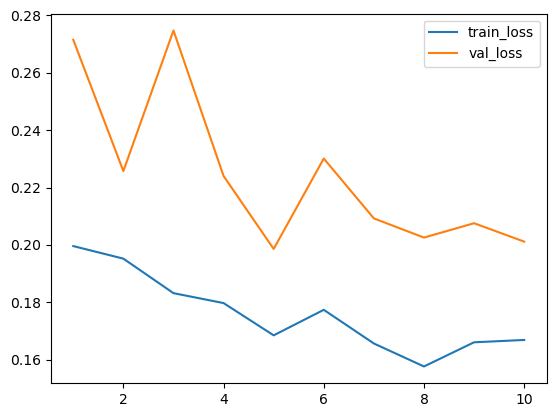

In [297]:
plt.plot(range(1,11),hist.history["loss"],label="train_loss")
plt.plot(range(1,11),hist.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [298]:
hist.history['val_loss']

[0.27153220772743225,
 0.2257583886384964,
 0.2747766077518463,
 0.22404974699020386,
 0.19862347841262817,
 0.2301405519247055,
 0.2092655450105667,
 0.20257849991321564,
 0.20758341252803802,
 0.20117324590682983]

In [299]:
predicted=np.argmax(fmodel.predict(X_test_transformed),axis=1)

23/23 [==============================] - 0s 2ms/step


In [300]:
predicted

array([1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 3, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 2, 3, 3, 0, 1, 2,
       1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 3, 1, 1,
       2, 1, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 3, 3, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 3, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 3, 1, 1, 2, 1, 2, 1, 1, 1,
       3, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 3, 1, 3, 3, 3,
       1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 3, 1, 3, 1, 0, 2, 1, 0,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 1, 0,
       2, 2, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 2, 2, 1, 1, 0, 2, 2, 2, 2, 3, 1, 3, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 3, 1, 2, 3,

In [301]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [302]:
print('accuracy',accuracy_score(y_test,predicted))

accuracy 0.9406896551724138


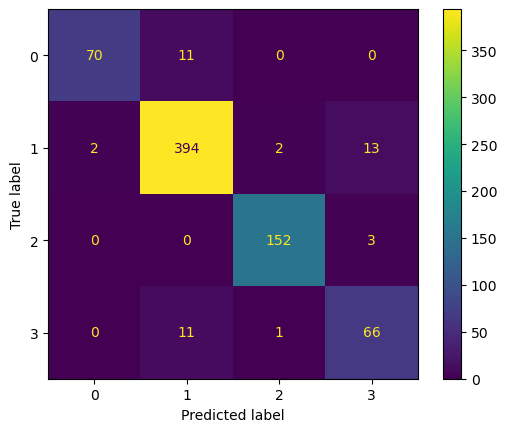

In [303]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()